In [1]:
#Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import matplotlib
from matplotlib import rc
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train_df = pd.read_csv('open/train.csv')
test_df = pd.read_csv('open/test.csv')

## 데이터 확인

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


In [5]:
train_df.describe(include='all')

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,...,39609,38618,38618,38618,38618,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
unique,39609,18057,7,6,199,11,6,3,14,11,...,6,13,3,97,6,NaN,NaN,NaN,NaN,NaN
top,ACCIDENT_00000,2019-11-15 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,59세,경상,NaN,NaN,NaN,NaN,NaN
freq,1,13,6179,36181,1749,19485,36420,31785,17104,21876,...,29309,20315,27505,867,25034,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.007776,0.262365,1.070085,0.126865,4.726704
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.090109,0.500845,0.992034,0.394670,3.207206
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,6.000000


 - 노면상태: 건조 데이터가 대부분
 - 사고 유형: 차대차 ..
 - 기상 상태: 맑음 ..

In [6]:
test_df.describe(include='all')

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
count,10963,10963,10963,10963,10963,10963,10963,10963
unique,10963,5548,7,5,192,11,6,3
top,ACCIDENT_39609,2022-11-10 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차
freq,1,10,1743,10321,422,5039,10394,8559


## EDA

In [7]:
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)

### 도로 형태별 사고 유형(count plot)

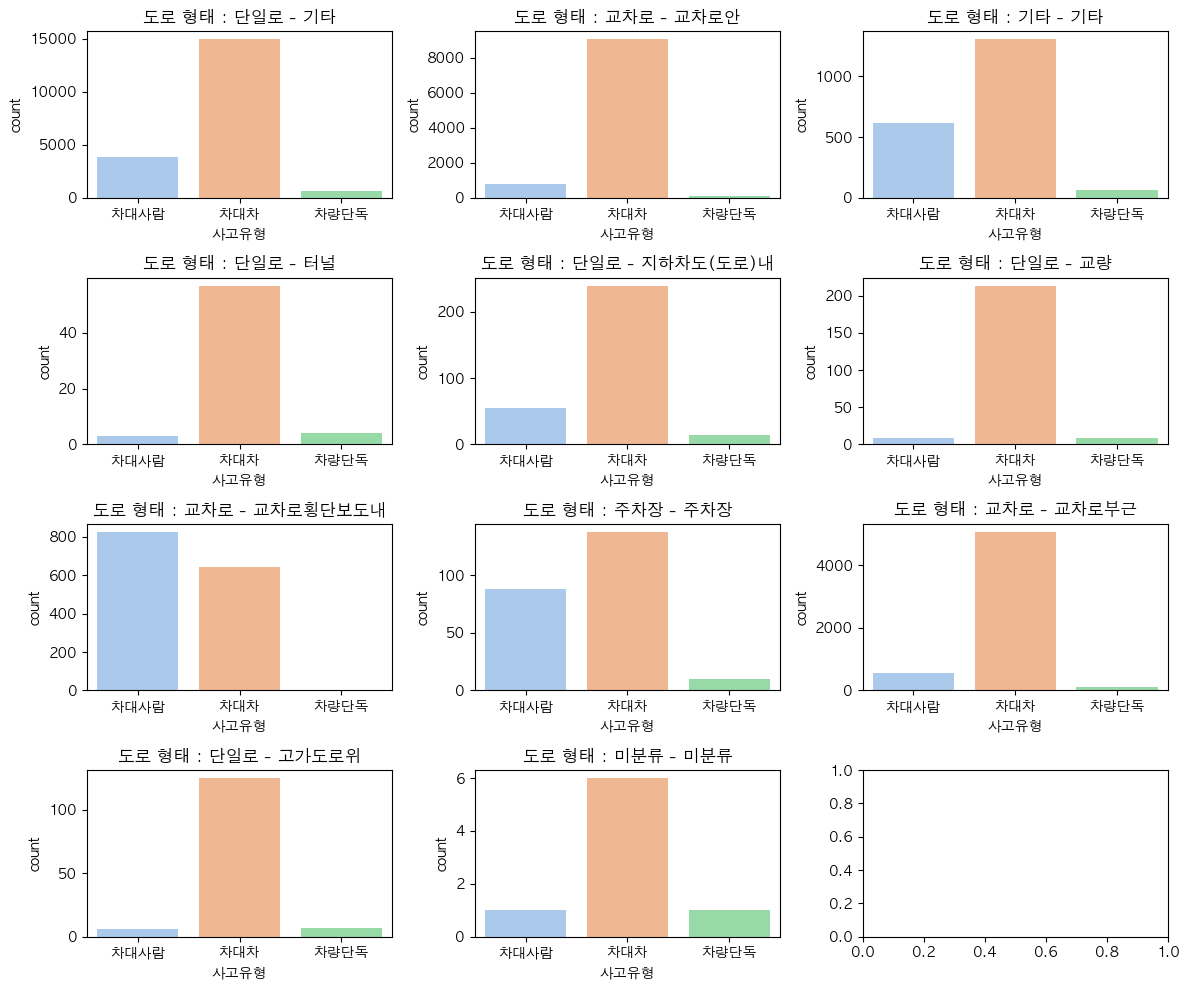

In [8]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_df['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_df['도로형태'].unique()):
    sns.countplot(x='사고유형', data=train_df[train_df['도로형태'] == k], ax=ax, order=x_order)
    ax.set_title(f"도로 형태 : {k}")

plt.tight_layout()
plt.show()

### 도로 형태/사고 유형별 ECLO (violin plot)

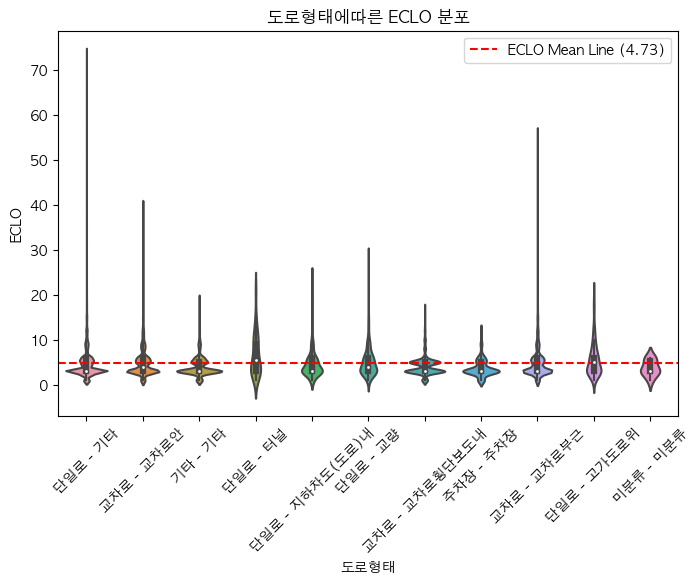

In [9]:
plt.figure(figsize=(8,5))
sns.violinplot(x='도로형태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("도로형태에따른 ECLO 분포")
plt.show()

 단일로-터널, 단일로-고가도로위 형태 주목

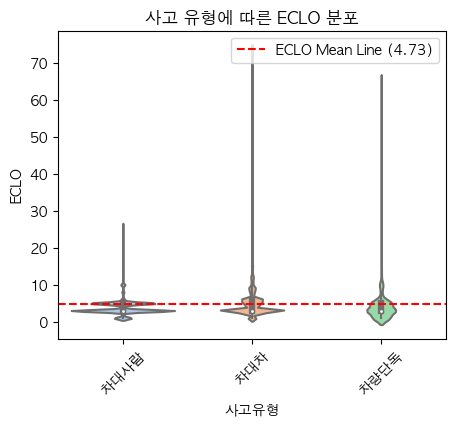

In [10]:
plt.figure(figsize=(5,4))
sns.violinplot(x='사고유형', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("사고 유형에 따른 ECLO 분포")
plt.show()

### 노면상태 별 ECLO 평균(barplot)

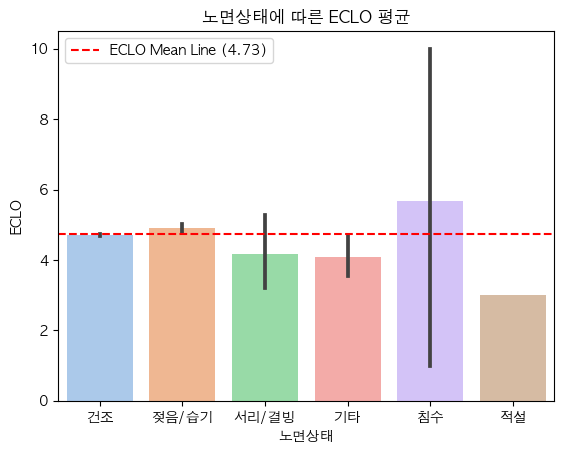

In [11]:
sns.barplot(x='노면상태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("노면상태에 따른 ECLO 평균")
plt.show()

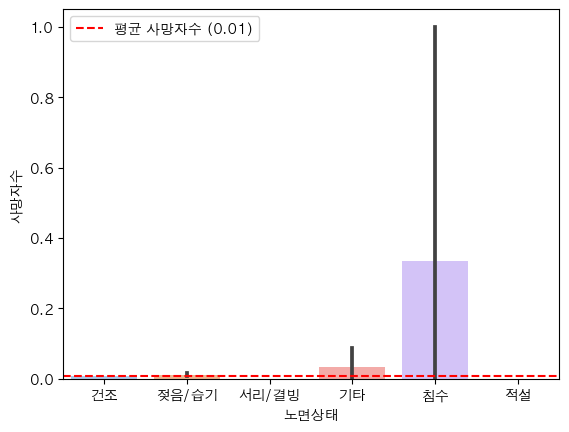

In [12]:
sns.barplot(x='노면상태', y='사망자수', data=train_df)
avg = train_df['사망자수'].mean()
plt.axhline(avg, ls='--', label=f'평균 사망자수 ({round(avg,2)})', color='r')
plt.legend()
plt.show()

### 사고 빈도분석

In [13]:
# 기상상태 / 사고유형
count_table = pd.crosstab(train_df['사고유형'], train_df['기상상태'])
styled_table = count_table.style.background_gradient(cmap=plt.cm.viridis)

styled_table

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,16,1,6198,480,0,138
차대차,39,5,29130,2032,8,571
차량단독,1,2,853,115,0,20


In [14]:
count_table = pd.crosstab(train_df['사고유형'],train_df['기상상태'], normalize='columns')
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,0.285714,0.125000,0.171305,0.182718,0.000000,0.189300
차대차,0.696429,0.625000,0.805119,0.773506,1.000000,0.783265
차량단독,0.017857,0.250000,0.023576,0.043776,0.000000,0.027435


In [15]:
# 기상상태/ 도로유형
count_table = pd.crosstab(train_df['도로형태'],train_df['기상상태'])
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
도로형태,,,,,,
교차로 - 교차로부근,6,1,5206,419,0,114
교차로 - 교차로안,6,1,9080,661,3,180
교차로 - 교차로횡단보도내,4,2,1310,121,0,37
기타 - 기타,15,0,1839,87,0,45
단일로 - 고가도로위,0,0,118,15,0,5
단일로 - 교량,0,0,206,20,1,5
단일로 - 기타,23,4,17857,1268,4,329
단일로 - 지하차도(도로)내,0,0,282,19,0,8
단일로 - 터널,1,0,59,2,0,2


### 시군구별 사고 발생 횟수/ECLO 시각화

In [16]:
import folium
from geopy.geocoders import Nominatim
import time

In [17]:
def get_coordinates(address):
    geolocator = Nominatim(user_agent = "South Korea")
    location = geolocator.geocode(address)

    if location:
        return location.latitude, location.longitude
    else:
        return 0, 0

# locations = [{address:get_coordinates(address)} for address in train_df['시군구'].unique()]

In [18]:
## geocoding 저장
import json
# with open('geo.json', "w", encoding='utf-8') as f:
#     json.dump(locations, f, ensure_ascii=False,indent=2)

## geocoding 파일 읽기

with open('geo.json', 'r', encoding='utf-8') as f:
    locations = json.load(f)

In [19]:
##  중복된 좌표 있는지 확인
coordinates_set = set()

duplicates = []
nan_coordinates = []
for loc in locations:
    coordinates = tuple(list(loc.values())[0])
    if coordinates in coordinates_set:
        duplicates.append(loc)

    elif coordinates == (0,0):
        nan_coordinates.append(loc)
    else:
        coordinates_set.add(coordinates)

if duplicates:
    print("중복된 데이터가 있습니다:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("중복된 데이터가 없습니다.")

중복된 데이터가 없습니다.


In [20]:
nan_coordinates

[{'대구광역시 달서구 대곡동': [0, 0]}]

In [21]:
# 딕셔너리로 변환
locations_dict = {key: value for item in locations for key, value in item.items()}

In [22]:
# 달서구 대곡동 좌표 입력(구글 검색해서)
locations_dict['대구광역시 달서구 대곡동'] = (35.7987376,128.5277021)

In [23]:
train_df['coordinate'] = train_df['시군구'].map(locations_dict)

In [24]:
## 시 군구별 발생횟수 count

count_df = train_df.groupby(by='시군구').count()['ID'].reset_index()
count_df

,시군구,ID
0,대구광역시 남구 대명동,1749
1,대구광역시 남구 봉덕동,625
2,대구광역시 남구 이천동,185
3,대구광역시 달서구 갈산동,110
4,대구광역시 달서구 감삼동,678
...,...,...
194,대구광역시 중구 태평로3가,40
195,대구광역시 중구 포정동,26
196,대구광역시 중구 하서동,10
197,대구광역시 중구 향촌동,5


In [25]:
## 발생횟수 정규화
def normalize_column(column):
    min_value = column.min()
    max_value = column.max()
    normalized_column = (column - min_value) / (max_value - min_value)
    return normalized_column

count_df['count'] = normalize_column(count_df['ID'])
count_df

,시군구,ID,count
0,대구광역시 남구 대명동,1749,1.000000
1,대구광역시 남구 봉덕동,625,0.356979
2,대구광역시 남구 이천동,185,0.105263
3,대구광역시 달서구 갈산동,110,0.062357
4,대구광역시 달서구 감삼동,678,0.387300
...,...,...,...
194,대구광역시 중구 태평로3가,40,0.022311
195,대구광역시 중구 포정동,26,0.014302
196,대구광역시 중구 하서동,10,0.005149
197,대구광역시 중구 향촌동,5,0.002288


In [26]:
# 발생횟수 시각화
map_daegu = folium.Map(location=[35.8714, 128.6014], zoom_start=12)

for i in range(len(count_df)):
    r = count_df.iloc[i]['count']*50
    name = count_df.iloc[i]['시군구'].split(' ')[-2]+count_df.iloc[i]['시군구'].split(' ')[-1]
    folium.CircleMarker(locations_dict[count_df.iloc[i]['시군구']],
                        popup=f'{name}',
                        radius=r, color='purple',fill_color='plum',
                        fill=True).add_to(map_daegu)

map_daegu

### 요일/ ECLO

In [28]:
train_df['ECLO'].describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

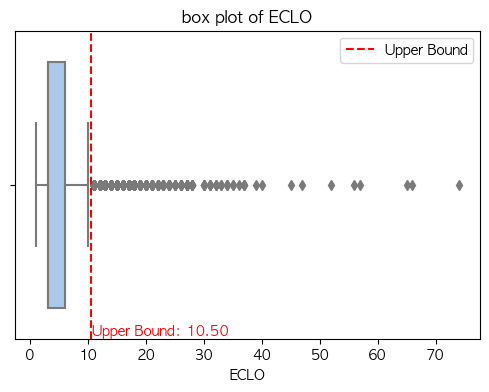

In [29]:
# ECLO upper bound 구하기

Q1 = train_df['ECLO'].quantile(0.25)
Q3 = train_df['ECLO'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR



plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=train_df)

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')

plt.legend()

plt.title("box plot of ECLO")
plt.show()

In [30]:
# ECLO 10.5를 기준으로 데이터 분리
high_ECLO_df = train_df[train_df['ECLO'] > 10.5]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 10.5]

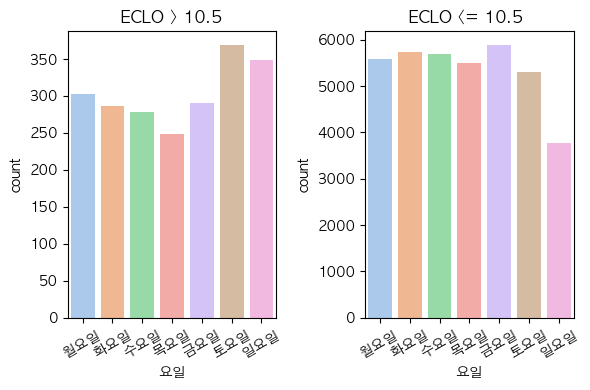

In [31]:
x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df, order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df, order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

 - ECLO 10.5 이상은 주말 발생 비율이 높다.
 - ECLO 10.5 이하는 주말 발생 비율이 낮음.

### 시간/ ECLO

In [32]:
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
train_df['hour'] = train_df['사고일시'].dt.hour

high_ECLO_df = train_df[train_df['ECLO'] > 10.5]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 10.5]

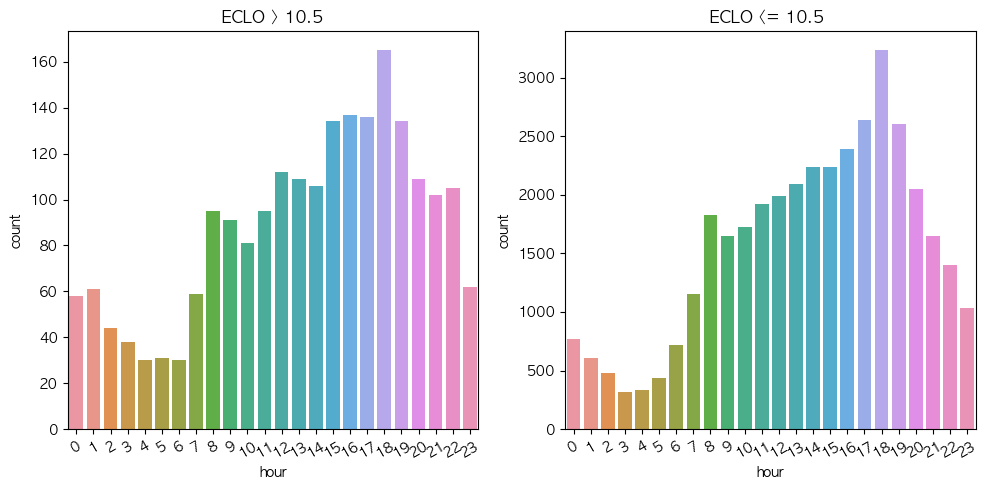

In [33]:
# 시간별 사고 발생 횟수

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='hour', data=high_ECLO_df,  ax=axes[0])
sns.countplot(x='hour', data=no_high_ECLO_df,  ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

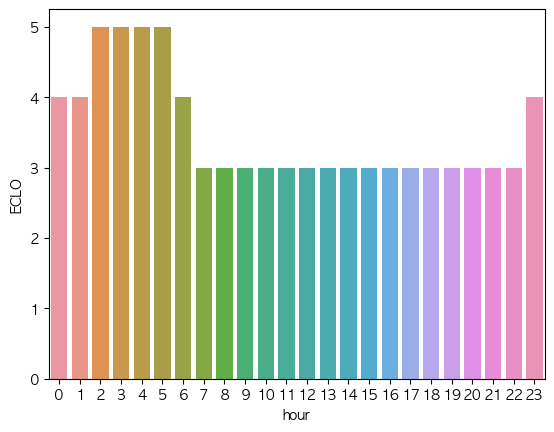

In [34]:
# 사고 발생 시간대별 ECLO median

sns.barplot(x='hour', y='ECLO', data=train_df, estimator=np.median, errorbar=None)
plt.show()

### 시간/ 사고형태/ 도로형태

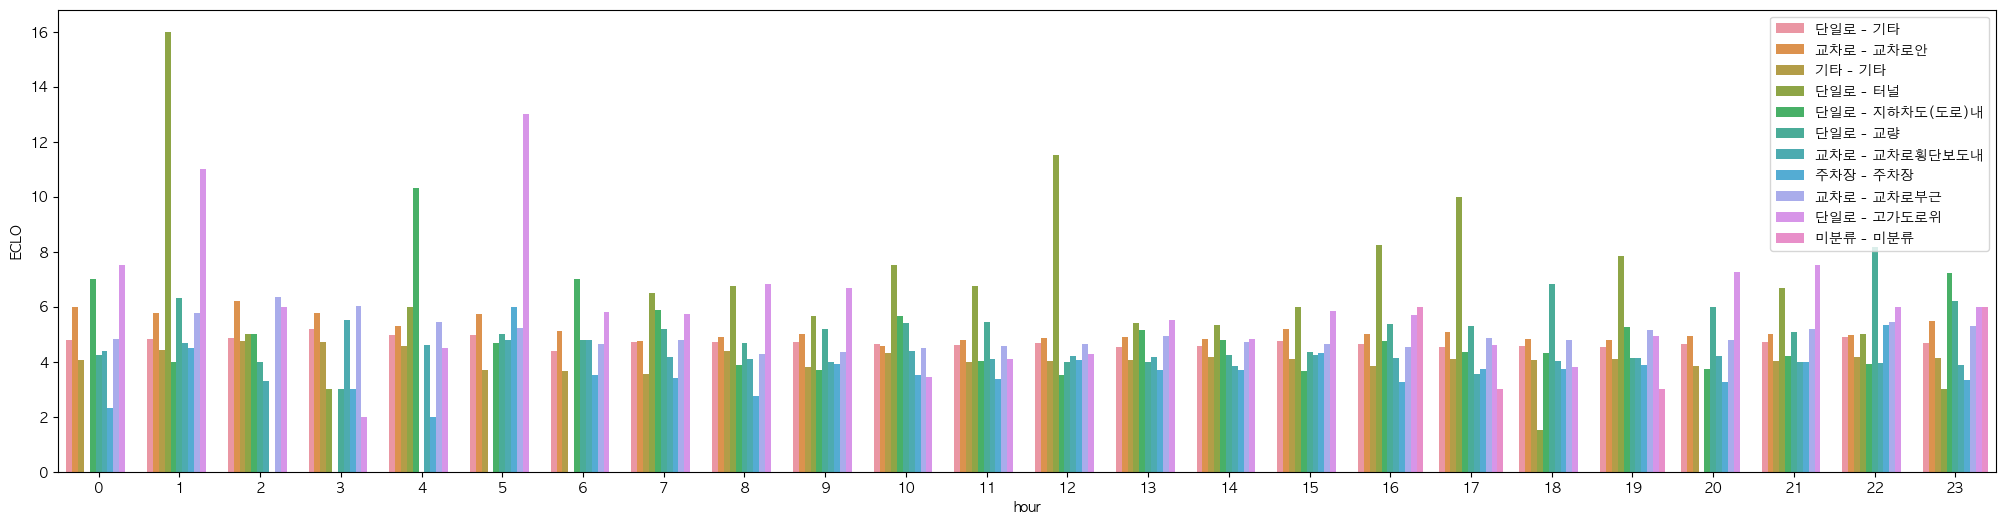

In [35]:
plt.figure(figsize=(25, 6))
sns.barplot(x='hour', y='ECLO', hue='도로형태', data=train_df, errorbar=None)
plt.legend(loc='upper right')
plt.show()